<h1 align="center"><b>Modelación Financiera I</b></h1>
<h1 align="center"><b> Módulo 3, parte 2 </b></h1>
<h1 align="center"><b> Computación numérica </b></h1>

*** 

***Docente:*** Santiago Rúa Pérez, PhD.

***e-mail:*** srua@udemedellin.edu.co

***Herramienta:*** [Jupyter Notebook](http://jupyter.org/)

***Kernel:*** Python 3.7

***MEDELLÍN - COLOMBIA***

***2022***

***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Numpy:-conceptos-finales" data-toc-modified-id="Numpy:-conceptos-finales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numpy: conceptos finales</a></span></li>
<div class="toc"><ul class="toc-item">    
    <li><span><a href="#Broadcasting" data-toc-modified-id="Broadcasting-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Broadcasting</a></span></li>
    <li><span><a href="#Comparaciones,-m%C3%A1scaras-y-l%C3%B3gica-booleana" data-toc-modified-id="Comparaciones,-m%C3%A1scaras-y-l%C3%B3gica-booleana-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Comparaciones, máscaras y lógica booleana</a></span></li>
    </ul></div>
    <li><span><a href="#Funciones-propias" data-toc-modified-id="Funciones-propias-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Funciones propias</a></span></li>
    <li><span><a href="#Programaci%C3%B3n-orientada-a-objetos" data-toc-modified-id="Programaci%C3%B3n-orientada-a-objetos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Programación orientada a objetos</a></span></li>
    <div class="toc"><ul class="toc-item">  
     <li><span><a href="#Ciclo-de-vida-de-un-objeto" data-toc-modified-id="Ciclo-de-vida-de-un-objeto-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ciclo de vida de un objeto</a></span></li>   
     <li><span><a href="#Herencia-de-clases" data-toc-modified-id="Herencia-de-clases-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Herencia de clases</a></span></li>   
    </ul></div>    
    </ul></div>

## Numpy: conceptos finales

En esta última parte se verá dos conceptos útiles cuando se tratan con arreglo de la libreria de `numpy`: boradcasting, el cual nos sirve para vectorizar operaciones, y las comparaciones.

### Broadcasting

- En la primera parte de este módulo vimos como utilizando la vectorización de operaciones, se podía aumentar la velocidad de ejecución de las operaciones realizadas con los arreglos de `numpy`. Otra forma de hacer lo anterior, es utilizando `broadcasting`. Básicamente es un conjutno de reglas para aplicar a funciones universales binarias que pueden ser usadas en arreglos de diferentes dimensiones.

Por ejemplo, si se quiere suma un número a una matriz, matemáticamente las dos matrices tienen que ser de la misma dimensión

In [1]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

Sin embargo, Python permite realizar boradcasting a estas operaciones binariasde diferentes tamaños, es decir, lo anterior se puede resolver simplemente haciendo lo siguiente

In [2]:
a+5

array([5, 6, 7])

Lo anterior inclusive se puede extender a arreglos multidimensionales

In [3]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

En el caso anterior el arreglo `a` se estira y se ajusta a la dimensión de `M`, para que el resultado tenga sentido. Miremos un caso mas complejo

a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

In [5]:
a+b

array([5, 6, 7])

Las operaciones anteriores se pueden ver visualmente de la siguiente forma

![Broadcasting Visual](img/Broadcasting.png)

#### Reglas del broadcasting

Para realizar el boradcasting, es importante tener claro las reglas de como se aplican:

- Regla 1: si dos arreglos difieren en el número de dimensiones, el tamaño del arreglo con menos dimension es `padded` con uno en la parte izquierda

- Regla 2: si el tamaño de los dos arreglos no coincide en ninguna dimensión, el arreglo con dimension igual a 1 en esa dimensión se estira para igual el otro arreglo

- Regla 3: si ninguna dimensión coinciden en tamaños, y tampoco es igual a 1, entonces se genera un error

**Ejemplo 1**

In [6]:
M = np.ones((2, 3))
a = np.arange(3)
print(M)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]
[0 1 2]


Miremos la operacion de estos dos arreglos

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

Analizando la regla 1, el arreglo ``a`` tiene menos dimensiones, entonces hacemos padding al lado izquierdo con unos 

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

Segun la regla 2, la primera dimensión no cuadra, entonces estiramos esta dimensión para que se genere la operación

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

Los tamaños cuadran, entonces se realiza la operación

In [7]:
M+a

array([[1., 2., 3.],
       [1., 2., 3.]])

**Ejemplo 2**

In [8]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)
print(a)
print(b)

[[0]
 [1]
 [2]]
[0 1 2]


In [9]:
print(a.shape)
print(b.shape)

(3, 1)
(3,)


In [10]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

**Ejemplo 3**

In [11]:
M = np.ones((3, 2))
a = np.arange(3)

Los arreglos tienen estas dimensiones
- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

La regla 1 pone unos al lado izquierdo de las dimensiones

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

La regla 2 toma la primera dimensión y la estira, pero no coincide la matriz final, por lo que no se puede realizar

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

### Comparaciones, máscaras y lógica booleana

Es importante entender el concepto de máscaras, ya que nos posibilitar modificar partes específicas de un arreglo dada una condición que se deba cumplir. Por ejemplo, se desea contar todos los valores mayores a cierto valor, o remover los outliers que estan por encima de algun umbral. 

#### Contando dias lluviosos

Supongase que se tiene la precipitación de cada día del año dado una ciudad. Se cargará la estadística de la ciudad de Seattle de 2014.

In [12]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

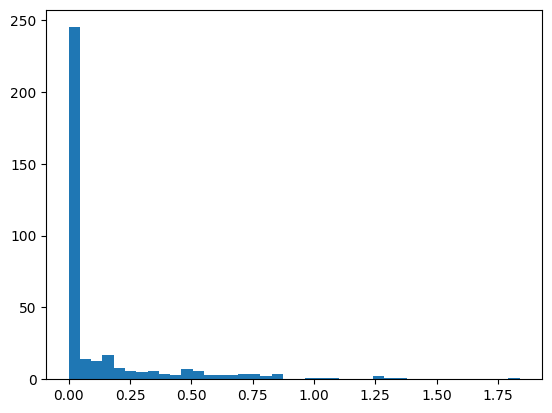

In [13]:
import matplotlib.pyplot as plt
plt.hist(inches, 40);

Se puede analizar rápidamente que la mayoria de los dias en Seattle no llueve. Sin embargo, si quisieramos saber cuantos dias hubo de lluvia, o cual es el promedio de precipitaciones, no es posible saberlo. Una forma de resolverlo es recorriendo todo el vector y realizar la operación. 

#### Operadores de comparación

Hasta el momento se ha enfocado todos los módulos en hacer operaciones matemáticas con los arreglos. Sin embargo, es importante realizar operaciones lógicas con los mismos. Los operadores de comparación, son funciones universales que realizan las operaciones elemento por elemento. El resultado siempre será del tipo Booleano

In [14]:
x = np.array([1, 2, 3, 4, 5])
x < 3

array([ True,  True, False, False, False])

In [15]:
x > 3

array([False, False, False,  True,  True])

In [16]:
x <= 3

array([ True,  True,  True, False, False])

In [17]:
x >= 3

array([False, False,  True,  True,  True])

In [18]:
x != 3

array([ True,  True, False,  True,  True])

In [19]:
x == 3

array([False, False,  True, False, False])

In [20]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

#### Contando arreglos binarios

In [21]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [22]:
np.count_nonzero(x < 6)

8

In [23]:
np.sum(x < 6)

8

In [24]:
print(x.shape)
np.sum(x < 6, axis=1)

(3, 4)


array([4, 2, 2])

In [25]:
np.any(x > 8)

True

In [26]:
np.all(x < 10)

True

#### Operadores booleanos

In [27]:
np.sum((inches > 0.5) & (inches < 1))

29

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

In [28]:
print("Número de días sin lluvias:       ", np.sum(inches == 0))
print("Número de días con lluvias:       ", np.sum(inches != 0))
print("Dias con mas de 0.5 in:           ", np.sum(inches > 0.5))
print("Días de lluvia con < 0.2 in:      ", np.sum((inches > 0) &
                                                (inches < 0.2)))

Número de días sin lluvias:        215
Número de días con lluvias:        150
Dias con mas de 0.5 in:            37
Días de lluvia con < 0.2 in:       75


## Funciones propias

Python tiene funciones propias las cuales se han usado para realizar operaciones matemáticas específicas. Sin embargo, al igual que los demas lenguajes de programación, Python nos posibilita empaquetar código en lo que se conoce como funciones. Las funciones en Python esta dadas por la palabra clave `def`.

In [29]:
def print_lyrics():
    print("I'm a lumberjack, and I'm okay.")
    print('I sleep all night and I work all day.')

Cuando se crea la función esta no se ejecuta hasta que sea llamada

In [30]:
print_lyrics()

I'm a lumberjack, and I'm okay.
I sleep all night and I work all day.


es importante entender que las funciones en python, son objetos de la clase funcion, es decir

In [31]:
print(type(print_lyrics))

<class 'function'>


Al igual que otros lenguajes de programación, las funciones en python pueden recibir varios parámetros y devover varios valores

In [32]:
def cuadrado_cubo(x):
    return x**2, x**3

In [33]:
a, b = cuadrado_cubo(2)
print(a)
print(b)

4
8


Adicionalmente Python posibilita tener parámetros por defecto cuando no son llamados

In [34]:
import numpy as np

def exponente(x,n=1):
    return np.power(x,n)

In [35]:
exponente(5,2)

25

In [36]:
exponente(5)

5

## Programación orientada a objetos

Hasta el momento hemos usado muchos objetos en el desarrollo de los diferentes módulos. El objetivo es que se entienda como es el funcionamiento y la función de crear un programa por clases y objetos.

In [37]:
stuff = list()
stuff.append('python')
stuff.append('santiago')
stuff.sort()
print (stuff[0])
print (stuff.__getitem__(0))
print (list.__getitem__(stuff,0))

python
python
python


El código anterior, primero se *construye* un objeto de la clase **list**, la segunda y tercera línea se llama al método **append()**, la cuarta línea de código utiliza el método **sort()**, y luego se recupera el valor en la posición cero. Se puede conocer todas las capacidades de un objeto utilizado la función `dir()`

In [38]:
dir(stuff)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

Uno de los objetivo de usar programación orientada a objetos, es la de encapsular funcionalidades relacionadas con ese objeto que solo se necesitan usar y no entender. Lo anterior posibilita concentrarse en resolver el problema e ignorar otros problemas. Un objeto puede contener una cantidad de funciones en su interior (llamados *métodos*) y datos que son usados por esas funciones (*atributos*). Para crear la estructura de un objeto y que característica va a tener entonces se utiliza la palabra clave `class`, por ejemplo:

In [39]:
class PartyAnimal:
    x = 0;
    
    def party(self):
        self.x = self.x + 1
        print("So far ", self.x)
        
an1 = PartyAnimal()
an2 = PartyAnimal()
an1.party()
an1.party()
an1.party()
PartyAnimal.party(an2)

So far  1
So far  2
So far  3
So far  1


Cada método inicia como una función con la palabra `def`. Recuerde que la definición de la clase no crea un objeto, solo define la plantilla de como es el objeto. La primera linea de ejecución

``` python
an1 = PartyAnimal()
```

se realiza uns instancia de esa clase o se construye un primer obejto de dicha clase. Posteriormente se llama al método que contiene dicho objeto con el primer parámetro, que por convención es `self`, entonces se ejecuta

``` python
    self.x = self.x + 1
    print("So far ", self.x)
```

### Ciclo de vida de un objeto

En el ejemplo anterior se crea una clase y se realizó dos instancias de dicha clase. Cuando el programa términa todas las variables son descartadas. Es importante pensar siempre en la creación y destrucción de variables, sobre todo cuando los objetos se vuelven mas complejos. Lo anterior se puede realizar utilizando dos métodos por defecto

In [40]:
class PartyAnimal:
    x = 0
    
    def __init__(self):
        print('I am constructed')
    
    def party(self) :
        self.x = self.x + 1
        print('So far',self.x)
    
    def __del__(self):
        print('I am destructed', self.x)

an = PartyAnimal()
an.party()
an.party()
an = 42
print('an contains',an)

I am constructed
So far 1
So far 2
I am destructed 2
an contains 42


### Herencia de clases

Otra característica poderosa de la programación orientada a objetos, es la habiliada de crear una nueva clase con características extendidas con base en otra clase. Cuando hacemos esto, la clase original se conoce como la clase padre y la nueva clase como la hija

In [41]:
from party import PartyAnimal

class CricketFan(PartyAnimal):
    points = 0
    def six(self):
        self.points = self.points + 6
        self.party()
        print(self.name,"points",self.points)
        
s = PartyAnimal("Sally")
s.party()
j = CricketFan("Jim")
j.party()
j.six()
print(dir(j))

Sally constructed
Sally party count 1
Jim constructed
Jim party count 1
Jim party count 2
Jim points 6
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'name', 'party', 'points', 'six', 'x']


## Laboratorio

1. Construya una clase en Python llamada circulo, el cual se le debe pasar al constructor el radio, y debe tener dos metodos el cual obtegan el área y el perímetro del circulo. 

2. Escriba una clase llamada punto. El constructor de la clase debe dos tuplas indicando los puntos, y tres métodos
    - un método `show` que imprima las coordenadas a analizar
    - un método `change` para cambiar estas coordenadas
    - un método `dist` para calcular la distancia entre dos puntos. Si el segundo punto no existe entonces, obtenga la distancia con respecto al origen por defecto

3. Cree una clase producto con los siguientes atributos privados:
    - código, nombre, precio
  creele su constructor, y adicionalmente tres métodos: uno que le permita obtener el precio del producto, cambiar el precio del producto, y que dado una cantidad total de unidades, calcule el total
 